# Data
In this section, we will see what types of data exist and how they look like.

Before we start, let's import the necessary libraries.

I used python 3.10.13 with conda env. I prepared a requirements.txt file for you to install the necessary libraries.

In [ ]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
! pip install -r requirements.txt

## Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchaudio
from torchaudio.utils import download_asset
import IPython

## Data Types

### 1. Numerical Data
Numbers are the most common type of data. They can be integers or floats. We can do several mathematical operations on them.

In [3]:
data1 = 3
data2 = 2.4

In [4]:
type(data1), type(data2)

(int, float)

In [5]:
print(f"{data1} + {data2} = {data1 + data2}")
print(f"{data1} - {data2} = {data1 - data2}")
print(f"{data1} * {data2} = {data1 * data2}")
print(f"{data1} / {data2} = {data1 / data2}")
print(f"{data1} // {data2} = {data1 // data2}")
print(f"{data1} % {data2} = {data1 % data2}")
print(f"{data1} ** {data2} = {data1 ** data2}")

3 + 2.4 = 5.4
3 - 2.4 = 0.6000000000000001
3 * 2.4 = 7.199999999999999
3 / 2.4 = 1.25
3 // 2.4 = 1.0
3 % 2.4 = 0.6000000000000001
3 ** 2.4 = 13.966610165238235


### 2. Series Data
Series data is set of multiple values that has an order.

In [6]:
data1 = [1, 2, 3, 4, 5]

length: 5


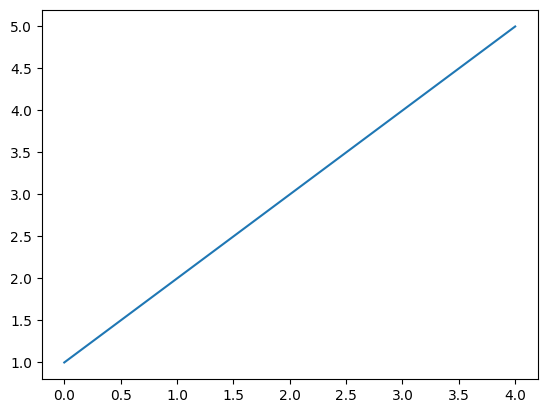

In [7]:
plt.plot(data1)
print(f"length: {len(data1)}")

We can do a simple prediction with series data. Let's guess the next value of the series in a simple way by adding the difference between the last two values to the last value.

In [8]:
next_value = data1[-1] + (data1[-1] - data1[-2])
print(f"next value: {next_value}")

next value: 6


length: 6


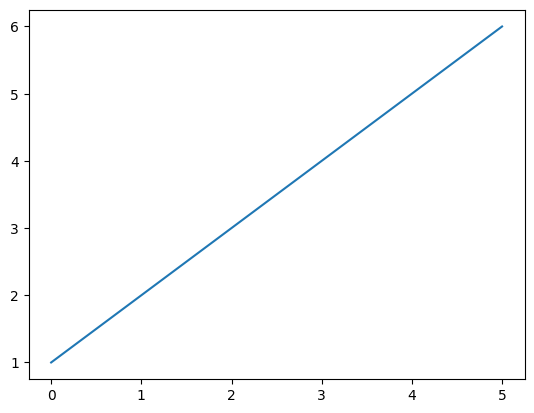

In [9]:
data2 = data1 + [next_value]
plt.plot(data2)
print(f"length: {len(data2)}")

Let's predict more.

length: 105


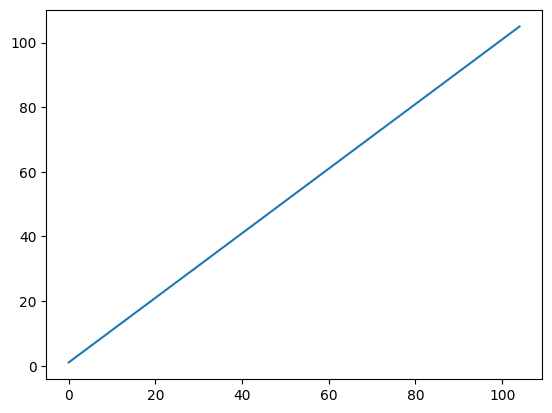

In [10]:
data3 = data1
for _ in range(100):
    next_value = data3[-1] + (data3[-1] - data3[-2])
    data3.append(next_value)
plt.plot(data3)
print(f"length: {len(data3)}")

### 3. Tabular Data
Tabular data is a set of data that has rows and columns. Each row is a record and each column is a feature. It can be used for managing database or several series data.

In [11]:
data1 = pd.DataFrame(
    {
        "name": ["Mickey", "Rachel", "Tom"],
        "age": [13, 25, 20],
        "country": ["US", "UK", "JP"]
    }
)

In [12]:
data1

,name,age,country
0,Mickey,13,US
1,Rachel,25,UK
2,Tom,20,JP


In [13]:
data2 = pd.DataFrame(
    {
        "humidity": [0.5, 0.4, 0.3, 0.2, 0.1],
        "temperature": [25, 26, 27, 28, 29],
        "rain": [True, False, True, False, True]
    }
)

In [14]:
data2

,humidity,temperature,rain
0,0.5,25,True
1,0.4,26,False
2,0.3,27,True
3,0.2,28,False
4,0.1,29,True


### 4. Image Data
Image data is a set of values that usually consists of 3 dimensions: width, height, and color channels. We will use 2 dimensions for simplicity.

In [15]:
data1 = np.array([
    [0, 0, 255],
    [0, 255, 0],
    [255, 0, 0]
], dtype=np.uint8)

In [16]:
print(f"width: {data1.shape[1]}")
print(f"height: {data1.shape[0]}")

width: 3
height: 3


([], [])

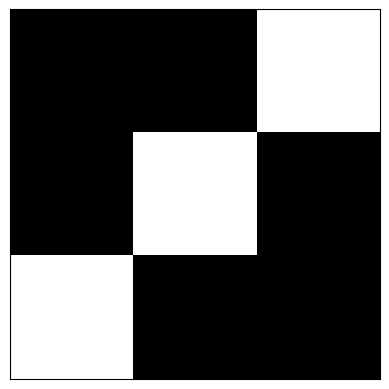

In [17]:
plt.imshow(data1, cmap="gray")
plt.xticks([])
plt.yticks([])

([], [])

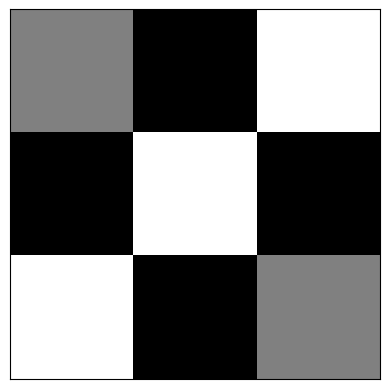

In [18]:
data1[0, 0] = 128
data1[2, 2] = 128
plt.imshow(data1, cmap="gray")
plt.xticks([])
plt.yticks([])

### 5. Audio Data
Audio data is a set of values similar to series data. Let's download sample audio data from torchaudio.

In [19]:
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")

In [20]:
waveform, sample_rate = torchaudio.load(SAMPLE_WAV_8000)

Shape of waveform: torch.Size([1, 27200])
Sample rate of waveform: 8000
Time of wav file: 3.4 seconds


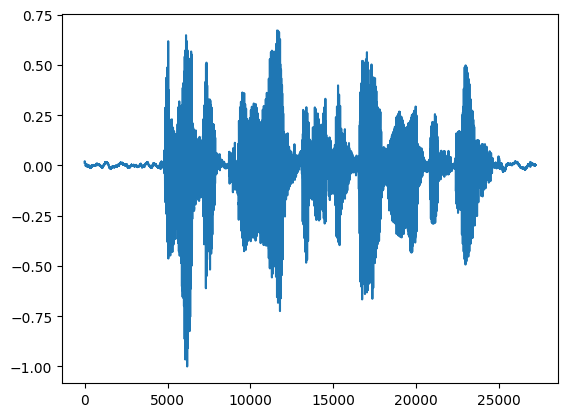

In [21]:
plt.plot(waveform.t().numpy())
print(f"Shape of waveform: {waveform.size()}")
print(f"Sample rate of waveform: {sample_rate}")
print(f"Time of wav file: {waveform.size(1) / sample_rate} seconds")

In [22]:
IPython.display.Audio(waveform.numpy(), rate=sample_rate, normalize=False)

Let's change his voice louder.

In [23]:
waveform_loud = waveform * 10
waveform_loud = torch.clamp(waveform_loud, -1.0, 1.0)

In [24]:
IPython.display.Audio(waveform_loud.numpy(), rate=sample_rate, normalize=False)